In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_514-Machine-Learning/Data/lyon_housing.csv')
df.head()

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete
0,2019-10-31,ancien,maison,5,100.0,NaN,247.0,0,530000.0,6 PAS DES ANTONINS,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24,16.387783
1,2018-11-26,ancien,maison,2,52.0,NaN,156.0,0,328550.0,12 RUE DU LUIZET,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24,15.459633
2,2016-08-04,ancien,appartement,1,28.0,28.2,0.0,1,42500.0,4 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.148839
3,2016-11-18,ancien,appartement,3,67.0,66.3,0.0,1,180900.0,6 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.439058
4,2016-12-16,ancien,appartement,1,28.0,NaN,0.0,1,97000.0,163 AV ROGER SALENGRO,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.515719


In [ ]:
import numpy as np
y = np.ravel(df[['prix']].to_numpy())
df.drop(columns=['prix'], inplace=True)  # Dropping columns

In [ ]:
# Adding a column of the year the transaction and construction occurs
df['date_transaction'] = pd.to_datetime(df['date_transaction'])
df['transaction_year'] = df['date_transaction'].dt.year

df['date_construction'] = pd.to_datetime(df['date_construction'])
df['construction_year'] = df['date_construction'].dt.year


df.drop(columns=['date_transaction', 'date_construction', 'adresse'], inplace=True)  # Dropping columns

In [ ]:
temp=pd.cut(df.anciennete,bins=[-5,0,5,10,20,30,40],labels=['UnderConstruction','0-5','5-10','10-20','20-30','30+'])
df['age']=temp
df.head(3)


,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,commune,latitude,longitude,anciennete,transaction_year,construction_year,age
0,ancien,maison,5,100.0,NaN,247.0,0,Villeurbanne,45.781673,4.879333,16.387783,2019,2003,10-20
1,ancien,maison,2,52.0,NaN,156.0,0,Villeurbanne,45.783240,4.884683,15.459633,2018,2003,10-20
2,ancien,appartement,1,28.0,28.2,0.0,1,Villeurbanne,45.781488,4.883474,13.148839,2016,2003,10-20


In [ ]:
df.drop(columns=['anciennete'], inplace=True)  # Dropping columns
standardize_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
standardize_columns

['nombre_pieces',
 'surface_logement',
 'surface_carrez_logement',
 'surface_terrain',
 'nombre_parkings',
 'latitude',
 'longitude',
 'transaction_year',
 'construction_year']

In [ ]:
string_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
df[string_columns].describe()

,type_achat,type_bien,commune,age
count,40516,40516,40516,40516
unique,2,2,10,6
top,ancien,appartement,Villeurbanne,20-30
freq,35562,39832,10330,19555


In [ ]:
for feature in string_columns:
    prefix_Name = feature+'$'
    df1 = pd.get_dummies(pd.Series(df[feature]), dtype=float) #drop_first=True
    df = df.drop(feature, axis=1) #Removing the original feature from the list
    df = pd.concat([df,df1], axis = 1)
df.head()

,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,latitude,longitude,transaction_year,construction_year,VEFA,ancien,appartement,maison,Lyon 1er Arrondissement,Lyon 2e Arrondissement,Lyon 3e Arrondissement,Lyon 4e Arrondissement,Lyon 5e Arrondissement,Lyon 6e Arrondissement,Lyon 7e Arrondissement,Lyon 8e Arrondissement,Lyon 9e Arrondissement,Villeurbanne,UnderConstruction,0-5,5-10,10-20,20-30,30+
0,5,100.0,NaN,247.0,0,45.781673,4.879333,2019,2003,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,52.0,NaN,156.0,0,45.783240,4.884683,2018,2003,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,28.0,28.2,0.0,1,45.781488,4.883474,2016,2003,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,67.0,66.3,0.0,1,45.781488,4.883474,2016,2003,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,28.0,NaN,0.0,1,45.781488,4.883474,2016,2003,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# pipeline only the continuous data

df_continuous= num_pipeline.fit_transform(df[standardize_columns])
# put the resulting numpy matrix back into a dataframe
df_continuous=pd.DataFrame(df_continuous,columns=standardize_columns)
df_continuous.head()

,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,latitude,longitude,transaction_year,construction_year
0,1.870396,1.231567,-0.022121,6.673884,-0.996559,1.496520,0.909078,0.534877,0.63382
1,-0.671310,-0.469113,-0.022121,4.177029,-0.996559,1.600806,1.087988,-0.172704,0.63382
2,-1.518546,-1.319453,-1.658059,-0.103293,0.666260,1.484208,1.047558,-1.587867,0.63382
3,0.175925,0.062349,0.143364,-0.103293,0.666260,1.484208,1.047558,-1.587867,0.63382
4,-1.518546,-1.319453,-0.022121,-0.103293,0.666260,1.484208,1.047558,-1.587867,0.63382


In [ ]:
df.drop(columns=standardize_columns, inplace=True)  # Dropping columns
x = pd.concat([df_continuous,df], axis=1)
x


,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,latitude,longitude,transaction_year,construction_year,VEFA,ancien,appartement,maison,Lyon 1er Arrondissement,Lyon 2e Arrondissement,Lyon 3e Arrondissement,Lyon 4e Arrondissement,Lyon 5e Arrondissement,Lyon 6e Arrondissement,Lyon 7e Arrondissement,Lyon 8e Arrondissement,Lyon 9e Arrondissement,Villeurbanne,UnderConstruction,0-5,5-10,10-20,20-30,30+
0,1.870396,1.231567,-0.022121,6.673884,-0.996559,1.496520,0.909078,0.534877,0.633820,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.671310,-0.469113,-0.022121,4.177029,-0.996559,1.600806,1.087988,-0.172704,0.633820,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.518546,-1.319453,-1.658059,-0.103293,0.666260,1.484208,1.047558,-1.587867,0.633820,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.175925,0.062349,0.143364,-0.103293,0.666260,1.484208,1.047558,-1.587867,0.633820,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.518546,-1.319453,-0.022121,-0.103293,0.666260,1.484208,1.047558,-1.587867,0.633820,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40511,-0.671310,-1.106868,-0.022121,-0.103293,0.666260,2.861893,-0.870423,1.242459,1.741278,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40512,-0.671310,-1.142299,-0.022121,-0.103293,-0.996559,2.861893,-0.870423,1.242459,1.741278,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40513,-0.671310,-1.496607,-0.022121,-0.103293,-0.996559,2.861893,-0.870423,1.242459,1.741278,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40514,-0.671310,-1.106868,-0.022121,-0.103293,-0.996559,2.861893,-0.870423,1.242459,1.741278,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
Final_features = x.columns

In [ ]:
from sklearn.decomposition import PCA
PCA_build  = PCA(n_components=.75, svd_solver = 'full') # captures 50% of the variance
PCA_model = PCA_build.fit_transform(x)

cnt = 1
column_header = []
for column in range(PCA_model.shape[1]):
    column_name = 'Comp_{}'.format(cnt)
    column_header.append(column_name)
    cnt += 1

x = pd.DataFrame(PCA_model, columns= column_header)
x

,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6
0,2.217885,1.082608,2.392664,6.329212,0.262163,2.058026
1,-0.455179,1.230011,2.097873,4.008240,-0.378624,1.075990
2,-2.383338,1.797914,1.002731,-0.317559,-1.285438,0.131707
3,0.319311,1.750661,0.982740,-0.266558,-1.503661,-0.352870
4,-1.516333,1.775214,0.950335,-0.479285,-1.405610,-0.143509
...,...,...,...,...,...,...
40511,-0.656044,0.762891,3.012472,-1.356514,0.984474,1.272304
40512,-1.062105,0.292995,3.476181,-0.694697,0.612084,0.661884
40513,-1.266824,0.313793,3.468395,-0.727348,0.624755,0.689734
40514,-1.041633,0.290915,3.476959,-0.691432,0.610817,0.659099


In [ ]:
Components_attributes = pd.DataFrame(PCA_build.components_, index = column_header, columns = Final_features)
Components_attributes

,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,latitude,longitude,transaction_year,construction_year,VEFA,ancien,appartement,maison,Lyon 1er Arrondissement,Lyon 2e Arrondissement,Lyon 3e Arrondissement,Lyon 4e Arrondissement,Lyon 5e Arrondissement,Lyon 6e Arrondissement,Lyon 7e Arrondissement,Lyon 8e Arrondissement,Lyon 9e Arrondissement,Villeurbanne,UnderConstruction,0-5,5-10,10-20,20-30,30+
Comp_1,0.560374,0.577799,0.529974,0.097990,0.231889,0.050360,-0.057692,0.023137,-0.007416,-0.010535,0.010535,-0.012469,0.012469,-0.005674,0.000334,-0.003440,0.008056,0.013679,0.009627,-0.015236,-0.006296,0.008478,-0.009528,-0.004418,0.001924,0.002435,-0.004942,0.000888,0.004113
Comp_2,0.034733,-0.058699,-0.013876,0.005140,0.283840,0.008133,0.546669,-0.070717,0.633911,0.085232,-0.085232,-0.001142,0.001142,-0.033436,-0.022992,-0.017033,-0.031971,-0.053422,-0.027337,-0.023947,0.008924,-0.048799,0.250014,0.071599,0.021669,0.017884,0.212924,-0.257977,-0.066099
Comp_3,0.004333,0.021973,-0.032028,0.072629,-0.279337,0.844708,-0.182439,0.170322,0.170326,-0.043909,0.043909,-0.008836,0.008836,0.031587,-0.004226,-0.070450,0.056704,0.004093,0.024266,-0.113420,-0.158871,0.100857,0.129461,-0.005713,0.007620,0.008350,0.110303,-0.137383,0.016823
Comp_4,0.060047,0.092154,-0.098858,0.813084,-0.399972,-0.129983,0.310742,0.033231,-0.105714,-0.049661,0.049661,-0.084256,0.084256,-0.000166,0.000478,0.041724,-0.015128,-0.034021,0.002497,-0.015059,0.030428,-0.057657,0.046905,-0.028336,-0.010802,-0.009679,0.035361,0.004023,0.009433
Comp_5,-0.021529,-0.035761,-0.073458,0.034395,0.224713,-0.133776,0.002307,0.928385,-0.025837,-0.049835,0.049835,-0.001880,0.001880,-0.006139,0.000803,0.004072,-0.008898,0.008451,-0.013564,0.012340,0.027896,-0.011523,-0.013437,-0.021530,-0.001626,0.003429,-0.000290,-0.153438,0.173456
Comp_6,-0.043026,-0.078604,-0.168231,0.477250,0.368774,-0.072388,-0.594626,-0.113743,0.362056,0.108537,-0.108537,-0.043329,0.043329,-0.011179,0.002737,-0.070220,0.012271,0.090308,-0.042014,0.074970,-0.012593,0.089358,-0.133638,0.094949,0.038394,0.028746,-0.097450,-0.039033,-0.025606


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.20,random_state=1)

# Overfit Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

neural_network_model = models.Sequential()
neural_network_model.add(layers.Dense(2000, activation='relu', input_shape=(6,)))
neural_network_model.add(layers.Dense(2000, activation='relu'))
neural_network_model.add(layers.Dense(2000, activation='relu'))
neural_network_model.add(layers.Dense(1, activation='linear'))

neural_network_model.compile(optimizer='adam',
                             loss='mean_squared_error',
                             metrics=['mse'])

In [ ]:
hist = neural_network_model.fit(x_train, y_train,
                                   epochs=50,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/50
16/16 [==============================] - 22s 1s/step - loss: 88465637376.0000 - mse: 88465637376.0000 - val_loss: 88627396608.0000 - val_mse: 88627396608.0000
Epoch 2/50
16/16 [==============================] - 20s 1s/step - loss: 85181136896.0000 - mse: 85181136896.0000 - val_loss: 79810519040.0000 - val_mse: 79810519040.0000
Epoch 3/50
16/16 [==============================] - 31s 2s/step - loss: 65447690240.0000 - mse: 65447690240.0000 - val_loss: 43024818176.0000 - val_mse: 43024818176.0000
Epoch 4/50
16/16 [==============================] - 31s 2s/step - loss: 22453014528.0000 - mse: 22453014528.0000 - val_loss: 13316352000.0000 - val_mse: 13316352000.0000
Epoch 5/50
16/16 [==============================] - 30s 2s/step - loss: 12808734720.0000 - mse: 12808734720.0000 - val_loss: 10870683648.0000 - val_mse: 10870683648.0000
Epoch 6/50
16/16 [==============================] - 31s 2s/step - loss: 11028770816.0000 - mse: 11028770816.0000 - val_loss: 10535436288.0000 - val_ms

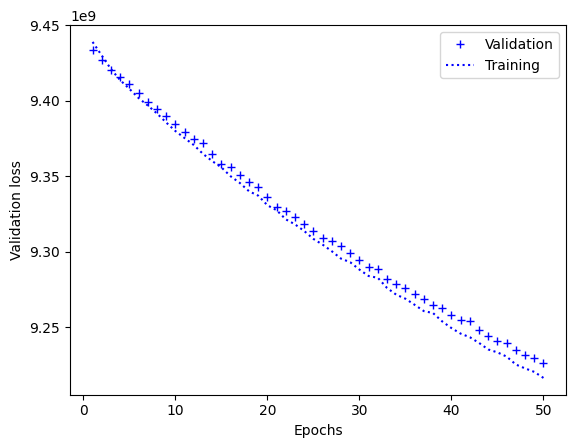

In [ ]:
epochs = range(1, 51)
val_loss = hist.history['val_loss']
loss=hist.history['loss']

import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, loss, 'b:', label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


# L2 Regularizer (the best model)

In [ ]:
from tensorflow.keras import regularizers

regl2 = models.Sequential()
regl2.add(layers.Dense(2000, kernel_regularizer=regularizers.l2(0.1), activation='relu', input_shape=(6,)))
regl2.add(layers.Dense(2000, kernel_regularizer=regularizers.l2(0.1), activation='relu'))
regl2.add(layers.Dense(2000, kernel_regularizer=regularizers.l2(0.1), activation='relu'))
regl2.add(layers.Dense(1, activation='linear'))

regl2.compile(optimizer='adam',
                             loss='mean_squared_error',
                             metrics=['mse'])

In [ ]:
hist = regl2.fit(x_train, y_train,
                                   epochs=50,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/50
16/16 [==============================] - 23s 1s/step - loss: 88461606912.0000 - mse: 88461606912.0000 - val_loss: 88613724160.0000 - val_mse: 88613724160.0000
Epoch 2/50
16/16 [==============================] - 20s 1s/step - loss: 85004451840.0000 - mse: 85004451840.0000 - val_loss: 79644565504.0000 - val_mse: 79644565504.0000
Epoch 3/50
16/16 [==============================] - 31s 2s/step - loss: 64799096832.0000 - mse: 64799096832.0000 - val_loss: 42368237568.0000 - val_mse: 42368237568.0000
Epoch 4/50
16/16 [==============================] - 33s 2s/step - loss: 22071087104.0000 - mse: 22071085056.0000 - val_loss: 13690840064.0000 - val_mse: 13690838016.0000
Epoch 5/50
16/16 [==============================] - 20s 1s/step - loss: 12811274240.0000 - mse: 12811270144.0000 - val_loss: 10873203712.0000 - val_mse: 10873201664.0000
Epoch 6/50
16/16 [==============================] - 31s 2s/step - loss: 10945914880.0000 - mse: 10945910784.0000 - val_loss: 10497678336.0000 - val_ms

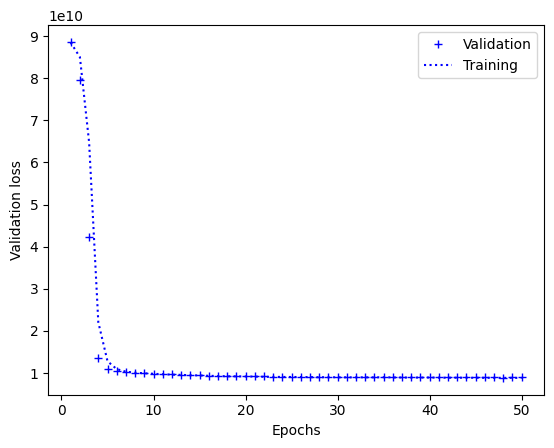

In [ ]:
epochs = range(1, 51)
val_loss = hist.history['val_loss']
loss=hist.history['loss']

import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, loss, 'b:', label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# L1 Regularizer

In [ ]:
from tensorflow.keras import regularizers


regl1 = models.Sequential()
regl1.add(layers.Dense(2000, kernel_regularizer=regularizers.l1(0.1), activation='relu', input_shape=(6,)))
regl1.add(layers.Dense(2000, kernel_regularizer=regularizers.l1(0.1), activation='relu'))
regl1.add(layers.Dense(2000, kernel_regularizer=regularizers.l1(0.1), activation='relu'))
regl1.add(layers.Dense(1, activation='linear'))

regl1.compile(optimizer='adam',
                             loss='mean_squared_error',
                             metrics=['mse'])

In [ ]:
hist = regl1.fit(x_train, y_train,
                                   epochs=50,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/50
16/16 [==============================] - 31s 2s/step - loss: 69294522368.0000 - mse: 69294497792.0000 - val_loss: 48606146560.0000 - val_mse: 48606105600.0000
Epoch 2/50
16/16 [==============================] - 33s 2s/step - loss: 26032556032.0000 - mse: 26032519168.0000 - val_loss: 12070325248.0000 - val_mse: 12070284288.0000
Epoch 3/50
16/16 [==============================] - 31s 2s/step - loss: 12590799872.0000 - mse: 12590756864.0000 - val_loss: 10669082624.0000 - val_mse: 10669042688.0000
Epoch 4/50
16/16 [==============================] - 30s 2s/step - loss: 10697961472.0000 - mse: 10697924608.0000 - val_loss: 10360866816.0000 - val_mse: 10360826880.0000
Epoch 5/50
16/16 [==============================] - 20s 1s/step - loss: 10229817344.0000 - mse: 10229777408.0000 - val_loss: 10116435968.0000 - val_mse: 10116397056.0000
Epoch 6/50
16/16 [==============================] - 31s 2s/step - loss: 9972791296.0000 - mse: 9972751360.0000 - val_loss: 9928894464.0000 - val_mse: 

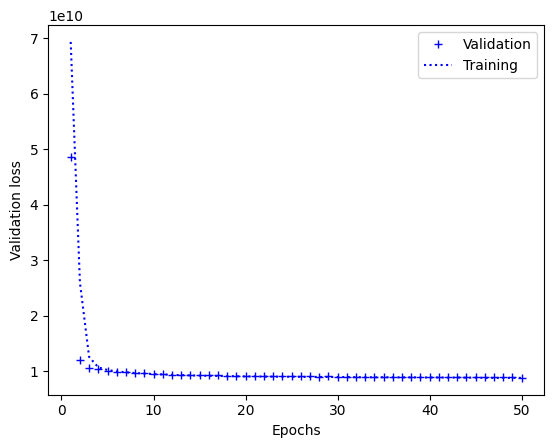

In [ ]:
epochs = range(1, 51)
val_loss = hist.history['val_loss']
loss=hist.history['loss']

import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, loss, 'b:', label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# Dropout

In [ ]:
drop_mag=0.5

dropout = models.Sequential()
dropout.add(layers.Dense(2000, activation='relu', input_shape=(6,)))
dropout.add(layers.Dropout(drop_mag))
dropout.add(layers.Dense(2000, activation='relu'))
dropout.add(layers.Dropout(drop_mag))
dropout.add(layers.Dense(2000, activation='relu'))
dropout.add(layers.Dropout(drop_mag))
dropout.add(layers.Dense(1, activation='linear'))

dropout.compile(optimizer='adam',
                             loss='mean_squared_error',
                             metrics=['mse'])


In [ ]:
hist = regl1.fit(x_train, y_train,
                                   epochs=50,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/50
16/16 [==============================] - 32s 2s/step - loss: 8776381440.0000 - mse: 8776345600.0000 - val_loss: 8858315776.0000 - val_mse: 8858279936.0000
Epoch 2/50
16/16 [==============================] - 31s 2s/step - loss: 8810634240.0000 - mse: 8810596352.0000 - val_loss: 8868945920.0000 - val_mse: 8868910080.0000
Epoch 3/50
16/16 [==============================] - 31s 2s/step - loss: 8778838016.0000 - mse: 8778801152.0000 - val_loss: 8870361088.0000 - val_mse: 8870323200.0000
Epoch 4/50
16/16 [==============================] - 30s 2s/step - loss: 8769638400.0000 - mse: 8769600512.0000 - val_loss: 8894233600.0000 - val_mse: 8894196736.0000
Epoch 5/50
16/16 [==============================] - 21s 1s/step - loss: 8738265088.0000 - mse: 8738228224.0000 - val_loss: 8871123968.0000 - val_mse: 8871087104.0000
Epoch 6/50
16/16 [==============================] - 31s 2s/step - loss: 8768871424.0000 - mse: 8768834560.0000 - val_loss: 8872506368.0000 - val_mse: 8872468480.0000
Epoc

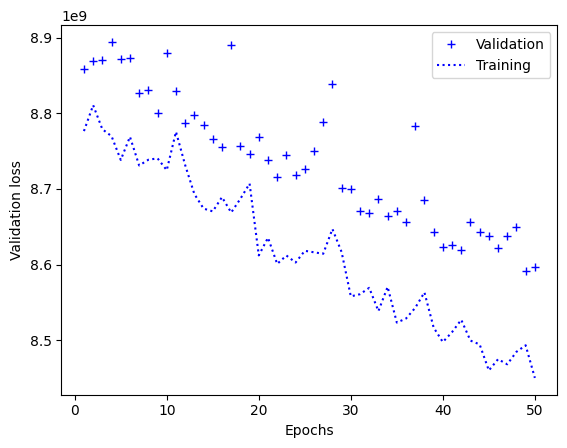

In [ ]:
epochs = range(1, 51)
val_loss = hist.history['val_loss']
loss=hist.history['loss']

import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, loss, 'b:', label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# Shap for the best model

In [ ]:
!pip install shap

In [ ]:
import shap
explainer = shap.PermutationExplainer(regl2.predict,x_train[:200])
shap_values = explainer.shap_values(x_test[:200])

41/41 [==============================] - 1s 18ms/step


PermutationExplainer explainer:   0%|          | 1/200 [00:00<?, ?it/s]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:   2%|▏         | 3/200 [00:16<10:16,  3.13s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:   2%|▏         | 4/200 [00:21<12:35,  3.86s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:   2%|▎         | 5/200 [00:25<13:23,  4.12s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:   3%|▎         | 6/200 [00:34<18:42,  5.79s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:   4%|▎         | 7/200 [00:40<18:22,  5.71s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:   4%|▍         | 8/200 [00:45<18:16,  5.71s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:   4%|▍         | 9/200 [00:51<18:03,  5.67s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:   5%|▌         | 10/200 [00:58<18:59,  5.99s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:   6%|▌         | 11/200 [01:02<17:32,  5.57s/it]

22/22 [==============================] - 1s 31ms/step


PermutationExplainer explainer:   6%|▌         | 12/200 [01:09<18:07,  5.79s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:   6%|▋         | 13/200 [01:15<18:12,  5.84s/it]

22/22 [==============================] - 1s 25ms/step


PermutationExplainer explainer:   7%|▋         | 14/200 [01:20<17:50,  5.75s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:   8%|▊         | 15/200 [01:28<19:55,  6.46s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:   8%|▊         | 16/200 [01:35<19:42,  6.43s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:   8%|▊         | 17/200 [01:40<18:41,  6.13s/it]

22/22 [==============================] - 1s 24ms/step


PermutationExplainer explainer:   9%|▉         | 18/200 [01:46<18:32,  6.11s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  10%|▉         | 19/200 [01:52<18:01,  5.97s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  10%|█         | 20/200 [01:57<17:22,  5.79s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  10%|█         | 21/200 [02:03<17:43,  5.94s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  11%|█         | 22/200 [02:08<16:39,  5.62s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  12%|█▏        | 23/200 [02:13<16:04,  5.45s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  12%|█▏        | 24/200 [02:19<15:58,  5.45s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  12%|█▎        | 25/200 [02:25<16:26,  5.64s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  13%|█▎        | 26/200 [02:31<17:05,  5.90s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  14%|█▎        | 27/200 [02:37<16:43,  5.80s/it]

22/22 [==============================] - 1s 29ms/step


PermutationExplainer explainer:  14%|█▍        | 28/200 [02:42<16:08,  5.63s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  14%|█▍        | 29/200 [02:48<16:03,  5.64s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  15%|█▌        | 30/200 [02:54<16:09,  5.70s/it]

22/22 [==============================] - 0s 17ms/step


PermutationExplainer explainer:  16%|█▌        | 31/200 [03:01<17:30,  6.22s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  16%|█▌        | 32/200 [03:06<16:25,  5.87s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  16%|█▋        | 33/200 [03:12<16:23,  5.89s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  17%|█▋        | 34/200 [03:17<15:10,  5.48s/it]

22/22 [==============================] - 1s 31ms/step


PermutationExplainer explainer:  18%|█▊        | 35/200 [03:22<15:17,  5.56s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  18%|█▊        | 36/200 [03:28<15:16,  5.59s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  18%|█▊        | 37/200 [03:33<14:44,  5.43s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  19%|█▉        | 38/200 [03:40<15:53,  5.89s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  20%|█▉        | 39/200 [03:44<14:32,  5.42s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  20%|██        | 40/200 [03:50<14:43,  5.52s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  20%|██        | 41/200 [03:56<14:41,  5.55s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  21%|██        | 42/200 [04:01<14:14,  5.41s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  22%|██▏       | 43/200 [04:06<14:18,  5.47s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  22%|██▏       | 44/200 [04:12<14:06,  5.43s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  22%|██▎       | 45/200 [04:18<14:38,  5.67s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  23%|██▎       | 46/200 [04:23<14:07,  5.50s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  24%|██▎       | 47/200 [04:29<14:05,  5.52s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  24%|██▍       | 48/200 [04:35<14:54,  5.88s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  24%|██▍       | 49/200 [04:40<14:01,  5.58s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  25%|██▌       | 50/200 [04:46<14:23,  5.76s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  26%|██▌       | 51/200 [04:52<13:46,  5.55s/it]

22/22 [==============================] - 1s 28ms/step


PermutationExplainer explainer:  26%|██▌       | 52/200 [04:58<14:39,  5.94s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  26%|██▋       | 53/200 [05:03<13:34,  5.54s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  27%|██▋       | 54/200 [05:08<12:58,  5.33s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  28%|██▊       | 55/200 [05:14<13:18,  5.51s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  28%|██▊       | 56/200 [05:19<12:54,  5.38s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  28%|██▊       | 57/200 [05:23<12:15,  5.14s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  29%|██▉       | 58/200 [05:30<12:55,  5.46s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  30%|██▉       | 59/200 [05:35<12:54,  5.49s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  30%|███       | 60/200 [05:41<12:59,  5.56s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  30%|███       | 61/200 [05:47<13:06,  5.66s/it]

22/22 [==============================] - 1s 29ms/step


PermutationExplainer explainer:  31%|███       | 62/200 [05:54<13:46,  5.99s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  32%|███▏      | 63/200 [06:00<13:45,  6.03s/it]

22/22 [==============================] - 1s 31ms/step


PermutationExplainer explainer:  32%|███▏      | 64/200 [06:05<13:30,  5.96s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  32%|███▎      | 65/200 [06:11<13:24,  5.96s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  33%|███▎      | 66/200 [06:17<13:03,  5.85s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  34%|███▎      | 67/200 [06:23<13:19,  6.01s/it]

22/22 [==============================] - 0s 17ms/step


PermutationExplainer explainer:  34%|███▍      | 68/200 [06:28<12:07,  5.51s/it]

22/22 [==============================] - 1s 29ms/step


PermutationExplainer explainer:  34%|███▍      | 69/200 [06:35<12:52,  5.90s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  35%|███▌      | 70/200 [06:39<11:47,  5.44s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  36%|███▌      | 71/200 [06:46<12:32,  5.83s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  36%|███▌      | 72/200 [06:51<12:19,  5.78s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  36%|███▋      | 73/200 [06:57<12:25,  5.87s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  37%|███▋      | 74/200 [07:04<12:44,  6.06s/it]

22/22 [==============================] - 0s 20ms/step


PermutationExplainer explainer:  38%|███▊      | 75/200 [07:10<12:20,  5.93s/it]

22/22 [==============================] - 1s 29ms/step


PermutationExplainer explainer:  38%|███▊      | 76/200 [07:15<12:09,  5.88s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  38%|███▊      | 77/200 [07:20<11:15,  5.49s/it]

22/22 [==============================] - 1s 22ms/step


PermutationExplainer explainer:  39%|███▉      | 78/200 [07:25<11:09,  5.49s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  40%|███▉      | 79/200 [07:32<11:31,  5.72s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  40%|████      | 80/200 [07:37<11:31,  5.76s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  40%|████      | 81/200 [07:44<11:42,  5.90s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  41%|████      | 82/200 [07:49<11:18,  5.75s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  42%|████▏     | 83/200 [07:54<10:32,  5.41s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  42%|████▏     | 84/200 [08:00<11:12,  5.80s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  42%|████▎     | 85/200 [08:05<10:35,  5.52s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  43%|████▎     | 86/200 [08:13<11:26,  6.02s/it]

22/22 [==============================] - 1s 29ms/step


PermutationExplainer explainer:  44%|████▎     | 87/200 [08:18<11:11,  5.94s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  44%|████▍     | 88/200 [08:26<12:21,  6.62s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  44%|████▍     | 89/200 [08:32<11:33,  6.25s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  45%|████▌     | 90/200 [08:38<11:25,  6.23s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  46%|████▌     | 91/200 [08:44<11:14,  6.18s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  46%|████▌     | 92/200 [08:51<11:15,  6.25s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  46%|████▋     | 93/200 [08:56<10:40,  5.99s/it]

22/22 [==============================] - 1s 32ms/step


PermutationExplainer explainer:  47%|████▋     | 94/200 [09:02<10:44,  6.08s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  48%|████▊     | 95/200 [09:07<09:56,  5.68s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  48%|████▊     | 96/200 [09:13<09:48,  5.66s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  48%|████▊     | 97/200 [09:19<10:03,  5.86s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  49%|████▉     | 98/200 [09:24<09:42,  5.71s/it]

22/22 [==============================] - 1s 27ms/step


PermutationExplainer explainer:  50%|████▉     | 99/200 [09:30<09:34,  5.69s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  50%|█████     | 100/200 [09:35<09:25,  5.66s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  50%|█████     | 101/200 [09:42<09:52,  5.99s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  51%|█████     | 102/200 [09:48<09:30,  5.82s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  52%|█████▏    | 103/200 [09:53<08:57,  5.54s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  52%|█████▏    | 104/200 [09:59<09:11,  5.74s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  52%|█████▎    | 105/200 [10:04<08:41,  5.49s/it]

22/22 [==============================] - 1s 32ms/step


PermutationExplainer explainer:  53%|█████▎    | 106/200 [10:08<08:17,  5.30s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  54%|█████▎    | 107/200 [10:14<08:16,  5.34s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  54%|█████▍    | 108/200 [10:19<08:04,  5.27s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  55%|█████▍    | 109/200 [10:25<08:22,  5.52s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  55%|█████▌    | 110/200 [10:31<08:18,  5.54s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  56%|█████▌    | 111/200 [10:36<07:53,  5.32s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  56%|█████▌    | 112/200 [10:41<07:58,  5.43s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  56%|█████▋    | 113/200 [10:46<07:43,  5.32s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  57%|█████▋    | 114/200 [10:54<08:32,  5.96s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  57%|█████▊    | 115/200 [10:59<08:17,  5.85s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  58%|█████▊    | 116/200 [11:05<07:55,  5.66s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  58%|█████▊    | 117/200 [11:10<07:32,  5.46s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  59%|█████▉    | 118/200 [11:14<07:13,  5.29s/it]

22/22 [==============================] - 0s 20ms/step


PermutationExplainer explainer:  60%|█████▉    | 119/200 [11:20<07:16,  5.39s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  60%|██████    | 120/200 [11:26<07:16,  5.45s/it]

22/22 [==============================] - 1s 31ms/step


PermutationExplainer explainer:  60%|██████    | 121/200 [11:31<07:19,  5.56s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  61%|██████    | 122/200 [11:37<07:15,  5.58s/it]

22/22 [==============================] - 1s 27ms/step


PermutationExplainer explainer:  62%|██████▏   | 123/200 [11:42<06:47,  5.30s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  62%|██████▏   | 124/200 [11:49<07:19,  5.79s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  62%|██████▎   | 125/200 [11:54<06:58,  5.58s/it]

22/22 [==============================] - 1s 32ms/step


PermutationExplainer explainer:  63%|██████▎   | 126/200 [12:00<07:08,  5.79s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  64%|██████▎   | 127/200 [12:05<06:48,  5.59s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  64%|██████▍   | 128/200 [12:10<06:17,  5.25s/it]

22/22 [==============================] - 0s 20ms/step


PermutationExplainer explainer:  64%|██████▍   | 129/200 [12:15<06:18,  5.34s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  65%|██████▌   | 130/200 [12:21<06:18,  5.41s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  66%|██████▌   | 131/200 [12:26<06:08,  5.34s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  66%|██████▌   | 132/200 [12:33<06:45,  5.97s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  66%|██████▋   | 133/200 [12:38<06:08,  5.50s/it]

22/22 [==============================] - 1s 23ms/step


PermutationExplainer explainer:  67%|██████▋   | 134/200 [12:44<06:07,  5.57s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  68%|██████▊   | 135/200 [12:48<05:44,  5.30s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  68%|██████▊   | 136/200 [12:54<05:58,  5.59s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  68%|██████▊   | 137/200 [13:00<05:56,  5.65s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  69%|██████▉   | 138/200 [13:05<05:40,  5.49s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  70%|██████▉   | 139/200 [13:13<06:06,  6.01s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  70%|███████   | 140/200 [13:17<05:40,  5.68s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  70%|███████   | 141/200 [13:24<05:43,  5.83s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  71%|███████   | 142/200 [13:29<05:22,  5.56s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  72%|███████▏  | 143/200 [13:35<05:27,  5.75s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  72%|███████▏  | 144/200 [13:40<05:20,  5.73s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  72%|███████▎  | 145/200 [13:46<05:05,  5.55s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  73%|███████▎  | 146/200 [13:52<05:10,  5.76s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  74%|███████▎  | 147/200 [13:57<04:51,  5.51s/it]

22/22 [==============================] - 1s 29ms/step


PermutationExplainer explainer:  74%|███████▍  | 148/200 [14:02<04:41,  5.41s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  74%|███████▍  | 149/200 [14:08<04:48,  5.66s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  75%|███████▌  | 150/200 [14:14<04:42,  5.65s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  76%|███████▌  | 151/200 [14:20<04:38,  5.69s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  76%|███████▌  | 152/200 [14:26<04:38,  5.81s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  76%|███████▋  | 153/200 [14:32<04:33,  5.83s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  77%|███████▋  | 154/200 [14:36<04:13,  5.50s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  78%|███████▊  | 155/200 [14:41<04:02,  5.40s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  78%|███████▊  | 156/200 [14:47<04:05,  5.58s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  78%|███████▊  | 157/200 [14:53<03:57,  5.53s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  79%|███████▉  | 158/200 [14:59<04:01,  5.76s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  80%|███████▉  | 159/200 [15:04<03:42,  5.44s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  80%|████████  | 160/200 [15:09<03:36,  5.42s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  80%|████████  | 161/200 [15:18<04:10,  6.43s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  81%|████████  | 162/200 [15:23<03:49,  6.03s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  82%|████████▏ | 163/200 [15:29<03:40,  5.96s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  82%|████████▏ | 164/200 [15:35<03:34,  5.95s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  82%|████████▎ | 165/200 [15:41<03:35,  6.16s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  83%|████████▎ | 166/200 [15:46<03:14,  5.71s/it]

22/22 [==============================] - 1s 31ms/step


PermutationExplainer explainer:  84%|████████▎ | 167/200 [15:52<03:09,  5.73s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  84%|████████▍ | 168/200 [15:57<03:01,  5.67s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  84%|████████▍ | 169/200 [16:02<02:44,  5.30s/it]

22/22 [==============================] - 1s 29ms/step


PermutationExplainer explainer:  85%|████████▌ | 170/200 [16:08<02:43,  5.44s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  86%|████████▌ | 171/200 [16:13<02:36,  5.38s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  86%|████████▌ | 172/200 [16:18<02:27,  5.25s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  86%|████████▋ | 173/200 [16:24<02:28,  5.51s/it]

22/22 [==============================] - 0s 20ms/step


PermutationExplainer explainer:  87%|████████▋ | 174/200 [16:29<02:19,  5.35s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  88%|████████▊ | 175/200 [16:35<02:21,  5.65s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  88%|████████▊ | 176/200 [16:41<02:13,  5.58s/it]

22/22 [==============================] - 1s 31ms/step


PermutationExplainer explainer:  88%|████████▊ | 177/200 [16:47<02:10,  5.68s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  89%|████████▉ | 178/200 [16:52<02:05,  5.69s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  90%|████████▉ | 179/200 [16:57<01:52,  5.38s/it]

22/22 [==============================] - 1s 21ms/step


PermutationExplainer explainer:  90%|█████████ | 180/200 [17:03<01:51,  5.60s/it]

22/22 [==============================] - 0s 20ms/step


PermutationExplainer explainer:  90%|█████████ | 181/200 [17:09<01:46,  5.60s/it]

22/22 [==============================] - 1s 31ms/step


PermutationExplainer explainer:  91%|█████████ | 182/200 [17:14<01:38,  5.50s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  92%|█████████▏| 183/200 [17:20<01:36,  5.65s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  92%|█████████▏| 184/200 [17:26<01:30,  5.64s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  92%|█████████▎| 185/200 [17:31<01:25,  5.68s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  93%|█████████▎| 186/200 [17:37<01:19,  5.67s/it]

22/22 [==============================] - 1s 31ms/step


PermutationExplainer explainer:  94%|█████████▎| 187/200 [17:43<01:16,  5.86s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  94%|█████████▍| 188/200 [17:49<01:09,  5.80s/it]

22/22 [==============================] - 0s 22ms/step


PermutationExplainer explainer:  94%|█████████▍| 189/200 [17:55<01:03,  5.76s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  95%|█████████▌| 190/200 [18:00<00:57,  5.70s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  96%|█████████▌| 191/200 [18:06<00:51,  5.68s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  96%|█████████▌| 192/200 [18:13<00:49,  6.23s/it]

22/22 [==============================] - 0s 20ms/step


PermutationExplainer explainer:  96%|█████████▋| 193/200 [18:18<00:40,  5.85s/it]

22/22 [==============================] - 1s 30ms/step


PermutationExplainer explainer:  97%|█████████▋| 194/200 [18:25<00:35,  5.99s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  98%|█████████▊| 195/200 [18:30<00:29,  5.83s/it]

22/22 [==============================] - 0s 19ms/step


PermutationExplainer explainer:  98%|█████████▊| 196/200 [18:35<00:21,  5.49s/it]

22/22 [==============================] - 1s 27ms/step


PermutationExplainer explainer:  98%|█████████▊| 197/200 [18:41<00:16,  5.62s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer:  99%|█████████▉| 198/200 [18:47<00:11,  5.73s/it]

22/22 [==============================] - 0s 20ms/step


PermutationExplainer explainer: 100%|█████████▉| 199/200 [18:54<00:06,  6.09s/it]

22/22 [==============================] - 0s 18ms/step


PermutationExplainer explainer: 100%|██████████| 200/200 [18:58<00:00,  5.66s/it]

22/22 [==============================] - 1s 32ms/step


PermutationExplainer explainer: 201it [19:04,  5.72s/it]


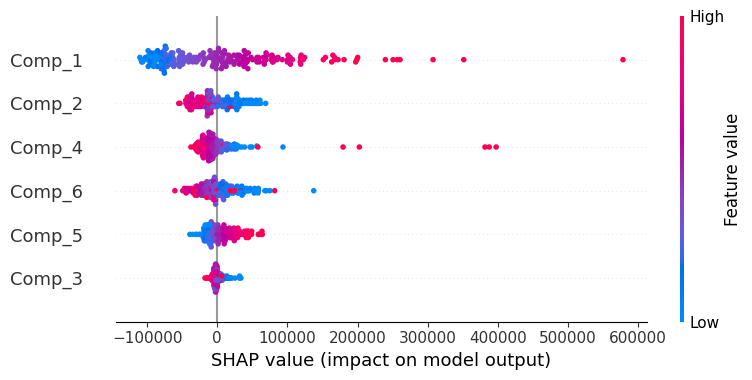

In [ ]:
fig=plt.figure(figsize=(10,10))

shap.summary_plot(shap_values,x_test[:200],feature_names=x_test.columns)

### Interpreting the results on the Shap summary plot


Based on the findings in the SHAP plot, we can observe that component 1 is the most valuable feature, followed by component 2, component 4, component 6, component 5, and lastly component 3. Referring back to the PCA model, we can break down component one as having high values in the variables normbre_pieces, surface_logment, and surface_carrez_logement. Meanwhile, component 2 is associated with high values in construction_year, and component 3 is associated with a high value in surface_terrain.

This indicates that the features best suited for predicting the price in this regression model are normbre_pieces, surface_logment, surface_carrez_logement, construction_year, and surface_terrain.